CleanRawData
=====
***

This notebook deals with trimming the beginning and end of all of the streams of data we collected (to datapoints collected while we were placing/removing the phone from our pockets) as well as removing `NaN` values. We want our data to be purely data collected while we were walking.

First, we import the modules needed to clean up the data.
* `numpy` is needed to load the file containing the raw data, as well as save the cleaned data to a file
* `matplotlib.pyplot` is useful when visualizing the data

In [406]:
import numpy as np
import matplotlib.pyplot as plt

Then we define a few functions to clean the data by removing all `nan` occurrences, removing missing pieces of data, and trimming the beginning and end according to the `seconds` parameter.

In [407]:
def remove_nan(l):
    return [x for x in l if str(x) != 'nan']

def clean(t, m, cutoff):
    t = remove_nan(t)
    m = remove_nan(m)
    a = 0
    b = 1
    while b < len(t):
        diff = t[b] - t[a]
        if diff > cutoff:
            del t[b:]
            del m[b:]
        a += 1
        b += 1
    return t, m

def trim(l, seconds, dt):
    x = int(seconds / dt)
    return remove_nan(l)[x: -1*x]

In order to decide how many seconds to trim off of the beginning and end, we can use `pyplot` to graph the data and get a better visualization. First we remove the `nan` values, then clean out any of the data that failed to collect (some CSVs have large time gaps where data is missing, not sure why. Luckily this won't harm our analysis in any way other than us having less data).

In [408]:
def graph(t, m):
    start = t[0]
    end = t[-1]
    plt.figure(figsize=(15, 5))
    plt.plot(t, m)
    plt.xticks(np.arange(start, end, step=5), np.arange(0, 120, step=5))
    plt.title('Acceleration vs Time')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Acceleration (m/s^2)')
    plt.show()

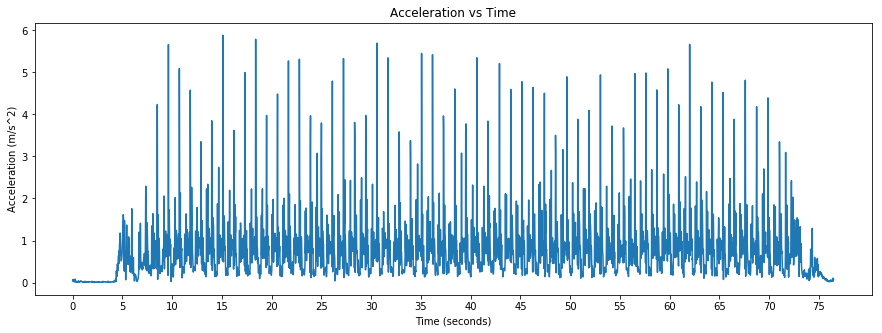

In [409]:
raw_data = np.load('./data/collected_raw/accel_data_raw.npy')

t = raw_data[0][0][0][0]
m = raw_data[0][0][0][4]

t = remove_nan(t)
m = remove_nan(m)

t, m = clean(t, m, 1)

graph(t1, m1)

In the graph you can see that the data we are after starts approximately 6 seconds into the stream and stops 6 seconds before the end, thus 6 seconds is an appropriate amount to trim off of the start and end. After trimming the start and end, this is what it looks like.

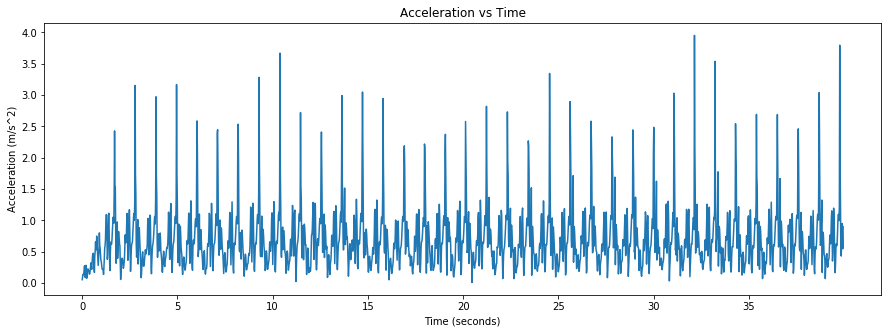

In [410]:
seconds = 6
dt = 0.02

t = trim(t, seconds, dt)
m = trim(m, seconds, dt)

graph(t, m)

Then we're ready to loop through the data and clean it. Simply loop through each list and sublist, clean and replace the data, then save it to a new file.

In [411]:
mag_clean = []
for p in range(len(raw_data)):
    person = []
    for t in range(len(raw_data[p])):
        trial = []
        for s in range(len(raw_data[p][t])):
            time = raw_data[p][t][s][0]
            mag  = raw_data[p][t][s][4]
            time, mag = clean(time, mag, 1)
            
            trial.append([trim(time, seconds, dt), trim(mag, seconds, dt)])
            
        person.append(trial)

    mag_clean.append(person)

np.save('./data/collected_clean/magnitude_data_clean.npy', mag_clean)